In [6]:
from matplotlib import pyplot as plt
import numpy as np
import torch

In [301]:
class Tree:
    def get_loss(self, x):
        xw1 = x[:2] * (torch.tensor([1, -1]) * self.W[0] + torch.tensor([0, 1]))
        xw2 = x[2:] * (torch.tensor([1, -1]) * self.W[1] + torch.tensor([0, 1]))
        u = torch.max(xw1) + torch.max(xw2)
        return u
    
    def init_weights(self):
        self.W =  torch.rand(2).clone().detach().requires_grad_(True)
        
    def fit(self, X, num_epochs=5000, lr=0.0001):
        history = []
        for _ in range(num_epochs):
            loss = self.get_loss(X)
            loss.backward()
            
            with torch.no_grad():
                self.W -= self.W.grad * lr
                self.W.grad.zero_()
            
            history.append(loss)
            
        return history, self.W
        

In [316]:
x = torch.tensor([1, 2, 3, 1]) 

In [317]:
tree = Tree()

In [318]:
tree.init_weights()

In [319]:
tree.get_loss(x)

tensor(2.3622, grad_fn=<AddBackward0>)

In [320]:
h, w = tree.fit(x)

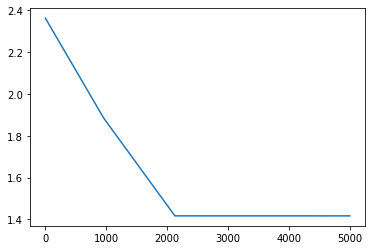

In [321]:
plt.plot(h)

In [322]:
w

tensor([0.6667, 0.2499], requires_grad=True)